In [53]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import json

In [28]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2443,Zn,0.326963,-0.029010,0.341468,-922.041633,-922.070643,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1382.0, 0.0, 141.0, 0.0, 0.0, 1.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -3.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0,..."
4888,2444,Al,0.569094,0.049230,0.544478,-922.070643,-922.021413,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4889,2444,Al,0.519863,-0.049230,0.544478,-922.021413,-922.070643,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4890,2445,Al,0.552314,0.053045,0.525792,-922.070643,-922.017599,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1381.0, 0.0, 143.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [29]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])

df = df[:]

df = df[df['migration_barriers'] < 1.1]
df[((df['energy_difference'] - df['energy_difference'].mean()) / df['energy_difference'].std()).abs() < 2]
df[((df['migration_barriers'] - df['migration_barriers'].mean()) / df['migration_barriers'].std()).abs() < 2]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 1521 42


,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2443,Zn,0.326963,-0.029010,0.341468,-922.041633,-922.070643,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1382.0, 0.0, 141.0, 0.0, 0.0, 1.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -3.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0,..."
4888,2444,Al,0.569094,0.049230,0.544478,-922.070643,-922.021413,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4889,2444,Al,0.519863,-0.049230,0.544478,-922.021413,-922.070643,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4890,2445,Al,0.552314,0.053045,0.525792,-922.070643,-922.017599,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1381.0, 0.0, 143.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [30]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,1223.677207,0.494024,-0.000365,0.494207,-894.398387,-894.398751
std,705.487772,0.168014,0.097024,0.161497,32.884486,32.884443
min,0.000000,-0.044152,-0.485086,-0.022076,-950.776122,-950.776122
25%,613.250000,0.381852,-0.056701,0.383687,-918.313340,-918.313340
50%,1225.000000,0.505656,-0.000031,0.503508,-899.902109,-899.902462
75%,1833.750000,0.593225,0.056223,0.585259,-875.456136,-875.456136
max,2445.000000,1.090263,0.485086,1.181733,-801.581643,-801.581643


In [31]:
# a,b = np.stack(df['one_hot_encode_forward']), np.stack(df['one_hot_encode_backward'])
# (a-b)[3,:]

In [32]:
# np.linalg.norm(a-b)

In [33]:
df = df.sample(frac=1)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [34]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [35]:
TEST_SIZE = 500

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [36]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(3205, 42)
(2549, 1521)
(883, 1521)
(938, 1521)


In [37]:
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

PCS Dimensionality Reduction
6 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 85.71428571428571%
PCS Dimensionality Reduction
420 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 72.38658777120315%
PCS Dimensionality Reduction
375 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 75.34516765285996%
PCS Dimensionality Reduction
393 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 74.16173570019724%


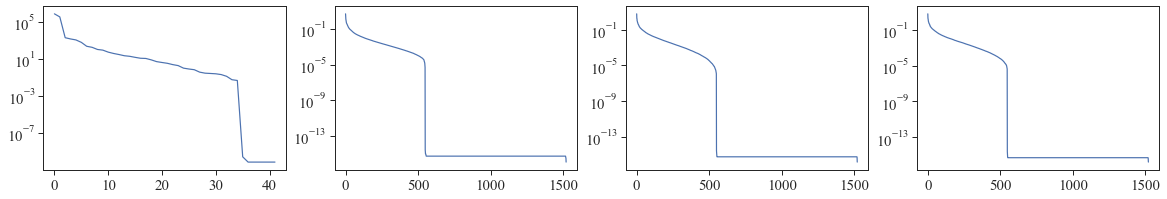

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S, S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99.9
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [39]:
NUM_FEATURES_1 = 42
NUM_FEATURES_2 = 250

In [40]:
x_train = x_train[:,:NUM_FEATURES_1]
x_test = x_test[:,:NUM_FEATURES_1]

In [41]:
x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [42]:
lamd = 0.05
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [43]:
def pred_energy_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_start'])[:NUM_FEATURES_1])

def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2]))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2]))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2]))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_end'])[:NUM_FEATURES_1]) - np.inner(theta, np.asarray(row['energy_encode_start'])[:NUM_FEATURES_1])

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               
df['predicted_energy'] = df.apply(lambda row: pred_energy_ls(row), axis=1)
df_train['predicted_energy'] = df_train.apply(lambda row: pred_energy_ls(row), axis=1)
df_test['predicted_energy'] = df_test.apply(lambda row: pred_energy_ls(row), axis=1)


df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['predicted_e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['predicted_e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['predicted_e0'] + 0.5*df_test['predicted_de']

In [44]:
theta

array([ 0.44456534,  0.50245332,  0.52300199,  0.53531032,  0.45593276,
        0.55363527,  2.00597283,  1.98053195,  1.98980617,  2.02632383,
        2.16955899,  2.15043138, -1.17663378, -1.17268868, -1.13094476,
       -1.12004029, -1.07125719, -1.12849   ,  1.21278705,  1.27651581,
        1.26233527,  1.26518752,  1.2313125 ,  1.2116307 , -0.29164091,
       -0.28640724, -0.31092792, -0.23241171, -0.22348236, -0.15136804,
       -0.29063913, -0.26453823, -0.22130069, -0.26972805, -0.28213867,
       -0.31171801, -0.03929505, -0.02631738, -0.03662417, -0.05496585,
       -0.10924916, -0.12629397])

In [45]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward,predicted_energy,predicted_e0,predicted_de,predicted_barrier
4091,2045,Mg,0.199927,-0.096212,0.248033,-899.475618,-899.571830,"[0.0, 0.25, 0.75, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[0.0, 0.25, 0.75, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[1323.0, 110.0, 24.0, 36.0, 29.0, 2.0, 656.0, ...","[1323.0, 110.0, 24.0, 37.0, 28.0, 2.0, 656.0, ...","[0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 1.0, 0.0,...","[0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0...",-900.664965,0.272499,0.123750,0.334374
3739,1869,Mg,0.499394,-0.076064,0.537426,-878.160522,-878.236586,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1198.0, 236.0, 34.0, 42.0, 14.0, 0.0, 599.0, ...","[1198.0, 239.0, 34.0, 39.0, 14.0, 0.0, 599.0, ...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, -3.0, 0.0...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0,...",-878.021047,0.534211,-0.320955,0.373734
688,344,Al,0.419787,0.137256,0.351159,-834.254385,-834.117129,"[0.5, 0.0, 0.5, 0.75, 0.0, 0.25, 1.0, 0.0, 0.0...","[0.5, 0.0, 0.5, 0.75, 0.0, 0.25, 1.0, 0.0, 0.0...","[1091.0, 83.0, 190.0, 16.0, 87.0, 57.0, 545.0,...","[1087.0, 85.0, 192.0, 16.0, 87.0, 57.0, 546.0,...","[-4.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, -2.0, 1.0...","[4.0, -2.0, -2.0, 0.0, 0.0, 0.0, -1.0, 2.0, -1...",-833.979131,0.347964,0.259664,0.477796
4643,2321,Al,0.477214,0.209494,0.372467,-817.428108,-817.218614,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1077.0, 0.0, 293.0, 0.0, 0.0, 154.0, 549.0, 0...","[1070.0, 0.0, 300.0, 0.0, 0.0, 154.0, 552.0, 0...","[-7.0, 0.0, 7.0, 0.0, 0.0, 0.0, 3.0, 0.0, -3.0...","[7.0, 0.0, -7.0, 0.0, 0.0, 0.0, -3.0, 0.0, 3.0...",-821.940608,0.365405,0.904319,0.817565
2650,1325,Al,0.586298,0.036078,0.568259,-933.989418,-933.953340,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1429.0, 24.0, 71.0, 0.0, 0.0, 0.0, 726.0, 6.0...","[1428.0, 24.0, 72.0, 0.0, 0.0, 0.0, 726.0, 6.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-934.041481,0.576587,0.006834,0.580004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,465,Al,0.596052,0.059728,0.566188,-916.241577,-916.181849,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1363.0, 0.0, 144.0, 0.0, 0.0, 17.0, 693.0, 0....","[1362.0, 0.0, 145.0, 0.0, 0.0, 17.0, 696.0, 0....","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, -3.0...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -3.0, 0.0, 3.0...",-914.867290,0.565649,-0.032901,0.549198
3369,1684,Mg,0.265534,-0.049842,0.290454,-882.016790,-882.066632,"[0.75, 0.0, 0.25, 0.25, 0.75, 0.0, 0.0, 1.0, 0...","[0.75, 0.0, 0.25, 0.25, 0.75, 0.0, 0.0, 1.0, 0...","[1211.0, 205.0, 66.0, 28.0, 12.0, 2.0, 610.0, ...","[1211.0, 205.0, 66.0, 28.0, 12.0, 2.0, 610.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0,...",-881.978832,0.326205,0.096215,0.374312
2052,1026,Zn,0.336879,0.000530,0.336614,-882.247900,-882.247370,"[0.0, 0.25, 0.75, 0.75, 0.0, 0.25, 0.0, 0.0, 1...","[0.0, 0.25, 0.75, 0.75, 0.0, 0.25, 0.0, 0.0, 1...","[1250.0, 76.0, 122.0, 3.0, 36.0, 37.0, 620.0, ...","[1250.0, 76.0, 120.0, 3.0, 35.0, 40.0, 620.0, ...","[0.0, 0.0, -2.0, 0.0, -1.0, 3.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 2.0, 0.0, 1.0, -3.0, 0.0, 0.0, 0.0,...",-882.063146,0.363324,0.321011,0.523830
2980,1490,Al,0.511934,0.001783,0.511043,-913.925885,-913.924102,"[0.75, 0.0, 0.25, 0.75, 0.0, 0.25, 1.0, 0.0, 0...","[0.75, 0.0, 0.25, 0.75, 0.0, 0.25, 1.0, 0.0, 0...","[1362.0, 0.0, 146.0, 0.0, 0.0, 16.0, 692.0, 0....","[1362.0, 0.0, 146.0, 0.0, 0.0, 16.0, 690.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, 0.0, 2.0,.

rmse train 0.9526023965560512
rmse test 0.9385850012119905


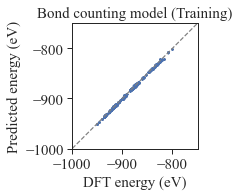

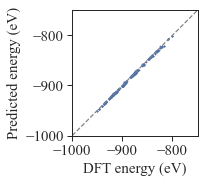

In [46]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Training)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
    
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_start'], df_train['predicted_energy'])))
##################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['energy_start'], df_test['predicted_energy'])))

rmse train 0.3039923919896889 -8.681180150602385
rmse test 0.34446359136974947 -13.395461204227718


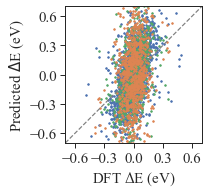

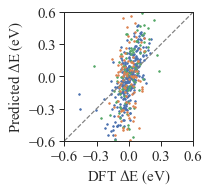

In [54]:
ele_list = ['Zn', 'Mg', 'Al']

sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })
lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train',
      np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])),
      r2_score(df_train['energy_difference'], df_train['predicted_de']))
###################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-0.6, 0.6]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{\Delta E}$ (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_test.png', dpi=1000, transparent=True)

print('rmse test', 
      np.sqrt(mean_squared_error(df_test['energy_difference'], df_test['predicted_de'])),
      r2_score(df_test['energy_difference'], df_test['predicted_de']))

rmse train 0.029267322201707677 0.9666534695298139
rmse test 0.03478759424836946 0.9587726341569718


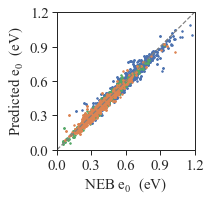

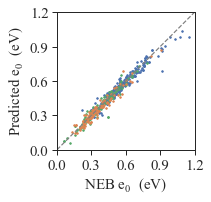

In [55]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('e0_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])),
     r2_score(df_train['e0'], df_train['predicted_e0']))
###########################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test,  hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

g.savefig('e0_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['e0'], df_test['predicted_e0'])),
     r2_score(df_test['e0'], df_test['predicted_e0']))

rmse train 0.15504251585805856 0.13770450864582873
rmse test 0.17421675452990587 0.025047667028595844


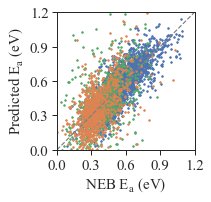

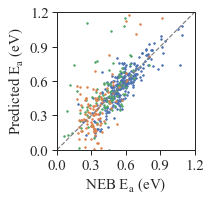

In [56]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])),
                 r2_score(df_train['migration_barriers'], df_train['predicted_barrier']))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=3,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])),
           r2_score(df_test['migration_barriers'], df_test['predicted_barrier']))

In [50]:
js_dist = {
    'Al' : {'transform_matrix' :  U_Al[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Al.tolist(), 'mean_y': mean_y_Al.tolist(), 'theta': theta_Al.tolist()},
    'Mg' : {'transform_matrix' :  U_Mg[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Mg.tolist(), 'mean_y': mean_y_Mg.tolist(), 'theta': theta_Mg.tolist()},
    'Zn' : {'transform_matrix' :  U_Zn[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Zn.tolist(), 'mean_y': mean_y_Zn.tolist(), 'theta': theta_Zn.tolist()},
    'Bond' : {'theta' : theta.tolist()}}
with open('kmc_parameters.json', 'w') as outfile:
    json.dump(js_dist, outfile)

<AxesSubplot:xlabel='e0', ylabel='Count'>

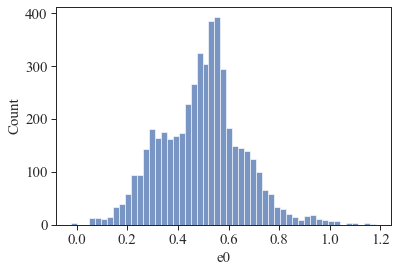

In [51]:
sns.histplot(data = df[:], x='e0')

In [26]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,1223.677207,0.494024,-0.000365,0.494207,-894.398387,-894.398751,-894.454407,0.494282,-0.000387,0.494088
std,705.487772,0.168014,0.097024,0.161497,32.884486,32.884443,32.860038,0.158293,0.335312,0.230175
min,0.000000,-0.044152,-0.485086,-0.022076,-950.776122,-950.776122,-951.299148,0.039635,-1.611428,-0.663724
25%,613.250000,0.381852,-0.056701,0.383687,-918.313340,-918.313340,-918.140391,0.386468,-0.178967,0.353955
50%,1225.000000,0.505656,-0.000031,0.503508,-899.902109,-899.902462,-900.796840,0.504635,0.000000,0.510685
75%,1833.750000,0.593225,0.056223,0.585259,-875.456136,-875.456136,-875.238011,0.583934,0.177866,0.638653
max,2445.000000,1.090263,0.485086,1.181733,-801.581643,-801.581643,-801.087148,1.078023,1.611428,1.471095
